<a href="https://colab.research.google.com/github/nyulnyul/FootballValues/blob/main/footballvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
#최초 1회 실행
!sudo apt-get install fonts-nanum


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [12]:
!rm ~/.cache/matplotlib -rf

In [13]:
#pip install pandas openpyxl
#최초 1회 실행


#데이터 전처리 과정

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

# 폰트 설치 경로 확인
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# 폰트 설정
mpl.rcParams['font.family'] = 'NanumBarunGothic'

# 음수 부호 정상 출력을 위한 설정
mpl.rcParams['axes.unicode_minus'] = False


In [63]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

from google.colab import drive

In [60]:
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/realfootball.xlsx'

# !git clone https://github.com/nyulnyul/FootballValues.git '/content/drive/My Drive/FootballValues'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##파일 존재 여부 파악

파일이 존재합니다.
파일이 성공적으로 불러와졌습니다.
                name  age  height        nationality place_of_birth  price  \
0    Aaron Cresswell   33    1.70            England      Liverpool    2.5   
1       Aaron Hickey   20    1.85           Scotland        Glasgow   18.0   
2     Aaron Ramsdale   25    1.90            England     Chesterton   38.0   
3       Aaron Ramsey   32    1.78              Wales     Caerphilly    3.0   
4  Aaron Wan-Bissaka   25    1.83  England  DR Congo         London   22.0   

   max_price                     position  shirt_nr   foot  ...  \
0       12.0         Defender - Left-Back         3   left  ...   
1       18.0         Defender - Left-Back         2   both  ...   
2       38.0                   Goalkeeper         1  right  ...   
3       45.0  midfield - Central Midfield        16  right  ...   
4       40.0        Defender - Right-Back        29  right  ...   

  Per 90 Minutes.4_G+A-PK Per 90 Minutes.5_xG Per 90 Minutes.6_xAG  \
0                    0.10   

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


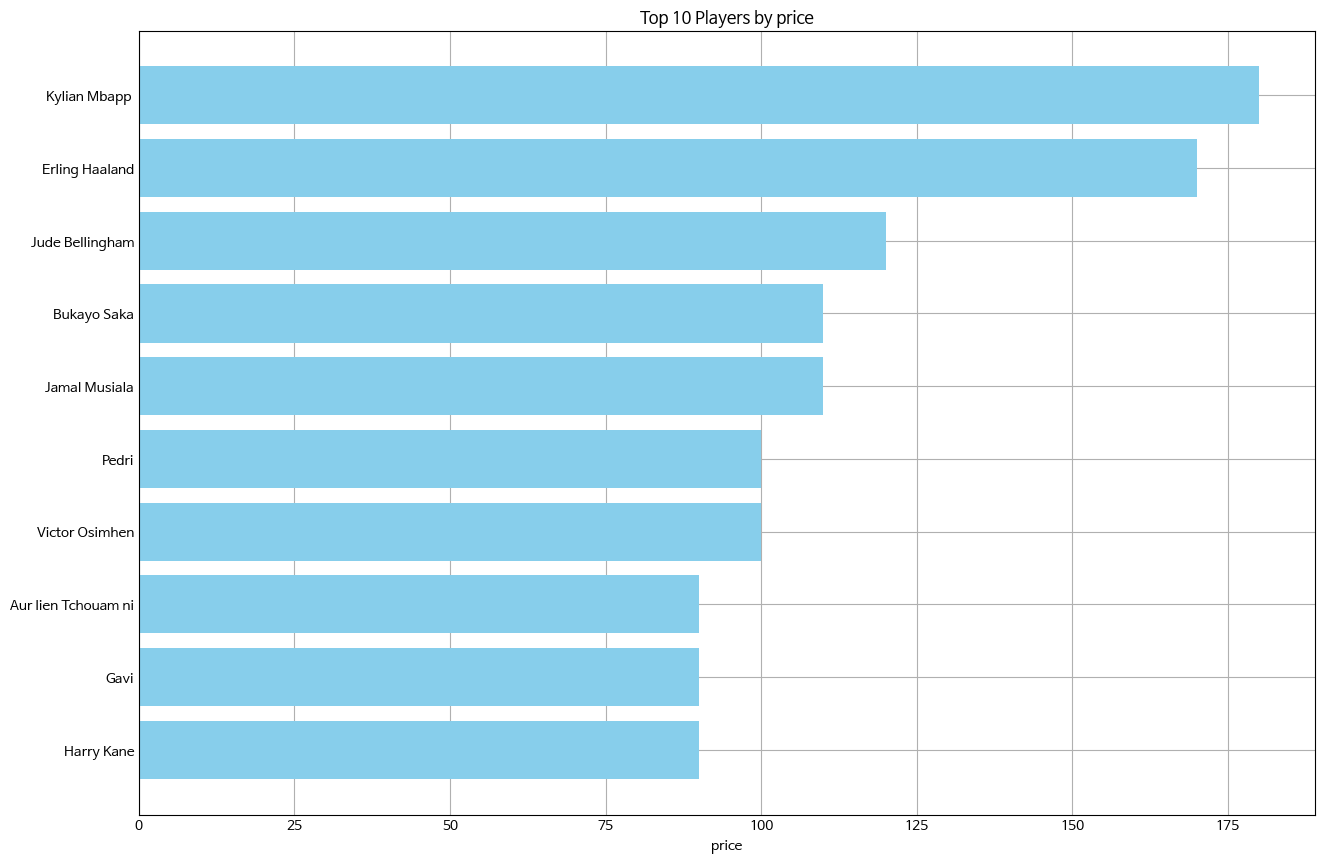

In [61]:
if os.path.exists(file_path):
    print("파일이 존재합니다.")
    try:
        # Excel 파일 불러오기
        df = pd.read_excel(file_path)
        print("파일이 성공적으로 불러와졌습니다.")

        # 데이터의 첫 몇 줄을 확인하여 구조 파악
        print(df.head())

        # 결측값 처리
        print("결측값 처리 전 각 열의 결측값 수:")
        print(df.isnull().sum())
        df.fillna(0, inplace=True)

        # 가장 높은 시장 가치를 가진 선수 찾기
        max_value_player = df.loc[df['price'].idxmax()]  # price 열을 사용하여 가장 높은 시장 가치를 가진 선수를 찾음
        print("가장 높은 시장 가치를 지닌 선수 정보:")
        print(max_value_player)

        # 시장 가치 상위 10명의 선수 시각화
        top_10_players = df.nlargest(10, 'price')  # 시장 가치 상위 10명의 선수를 찾음

        plt.figure(figsize=(12, 8))
        plt.barh(top_10_players['name'], top_10_players['price'], color='skyblue')  #시장 가치를 시각화
        plt.xlabel('price')
        plt.title('Top 10 Players by price')
        plt.gca().invert_yaxis()
        plt.show()

    except Exception as e:
        print(f"파일을 불러오는 중 오류가 발생했습니다: {e}")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 2210 non-null   int64         
 1   name                       2210 non-null   object        
 2   full_name                  2210 non-null   object        
 3   age                        2210 non-null   int64         
 4   height                     2210 non-null   float64       
 5   nationality                2210 non-null   object        
 6   place_of_birth             2210 non-null   object        
 7   price                      2210 non-null   float64       
 8   max_price                  2210 non-null   float64       
 9   position                   2210 non-null   object        
 10  shirt_nr                   2210 non-null   int64         
 11  foot                       2210 non-null   object        
 12  club  

In [88]:

# 카테고리형 변수에 대해 Label Encoding 수행
label_encoders = {}
categorical_columns = ['nationality', 'position', 'foot', 'club', 'player_agent', 'league']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le



# 날짜형 변수에 대해 날짜 처리 수행
df['contract_expires'] = pd.to_datetime(df['contract_expires'], errors='coerce')
df['joined_club'] = pd.to_datetime(df['joined_club'], errors='coerce')

# 날짜형 변수를 수치형 변수로 변환 (연도로 변환)하고 int64로 변환
df['contract_expires'] = df['contract_expires'].dt.year.astype('int64')
df['joined_club'] = df['joined_club'].dt.year.astype('int64')

# 결측치 확인 및 처리
df.fillna(0, inplace=True)


# 결과 확인
df.head()



,name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,...,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s
0,0,33,1.70,329,664,2.5,12.0,5,3,2,...,0.10,0.03,0.06,0.09,0.03,0.09,22.0,20.0,1769.0,19.7
1,1,20,1.85,160,460,18.0,18.0,5,2,1,...,0.00,0.01,0.01,0.01,0.01,0.01,0.0,0.0,0.0,0.0
2,2,25,1.90,329,297,38.0,38.0,7,1,3,...,0.03,0.00,0.02,0.02,0.00,0.02,37.0,37.0,3330.0,37.0
3,3,32,1.78,270,237,3.0,45.0,10,16,3,...,0.32,0.26,0.09,0.35,0.26,0.35,0.0,0.0,0.0,0.0
4,4,25,1.83,337,673,22.0,40.0,6,29,3,...,0.08,0.01,0.06,0.07,0.01,0.07,39.0,38.0,3474.0,38.6


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       2210 non-null   int64  
 1   age                        2210 non-null   int64  
 2   height                     2210 non-null   float64
 3   nationality                2210 non-null   int64  
 4   place_of_birth             2210 non-null   int64  
 5   price                      2210 non-null   float64
 6   max_price                  2210 non-null   float64
 7   position                   2210 non-null   int64  
 8   shirt_nr                   2210 non-null   int64  
 9   foot                       2210 non-null   int64  
 10  club                       2210 non-null   int64  
 11  contract_expires           2210 non-null   int64  
 12  joined_club                2210 non-null   int64  
 13  player_agent               2210 non-null   int64

## 결측치 필터링

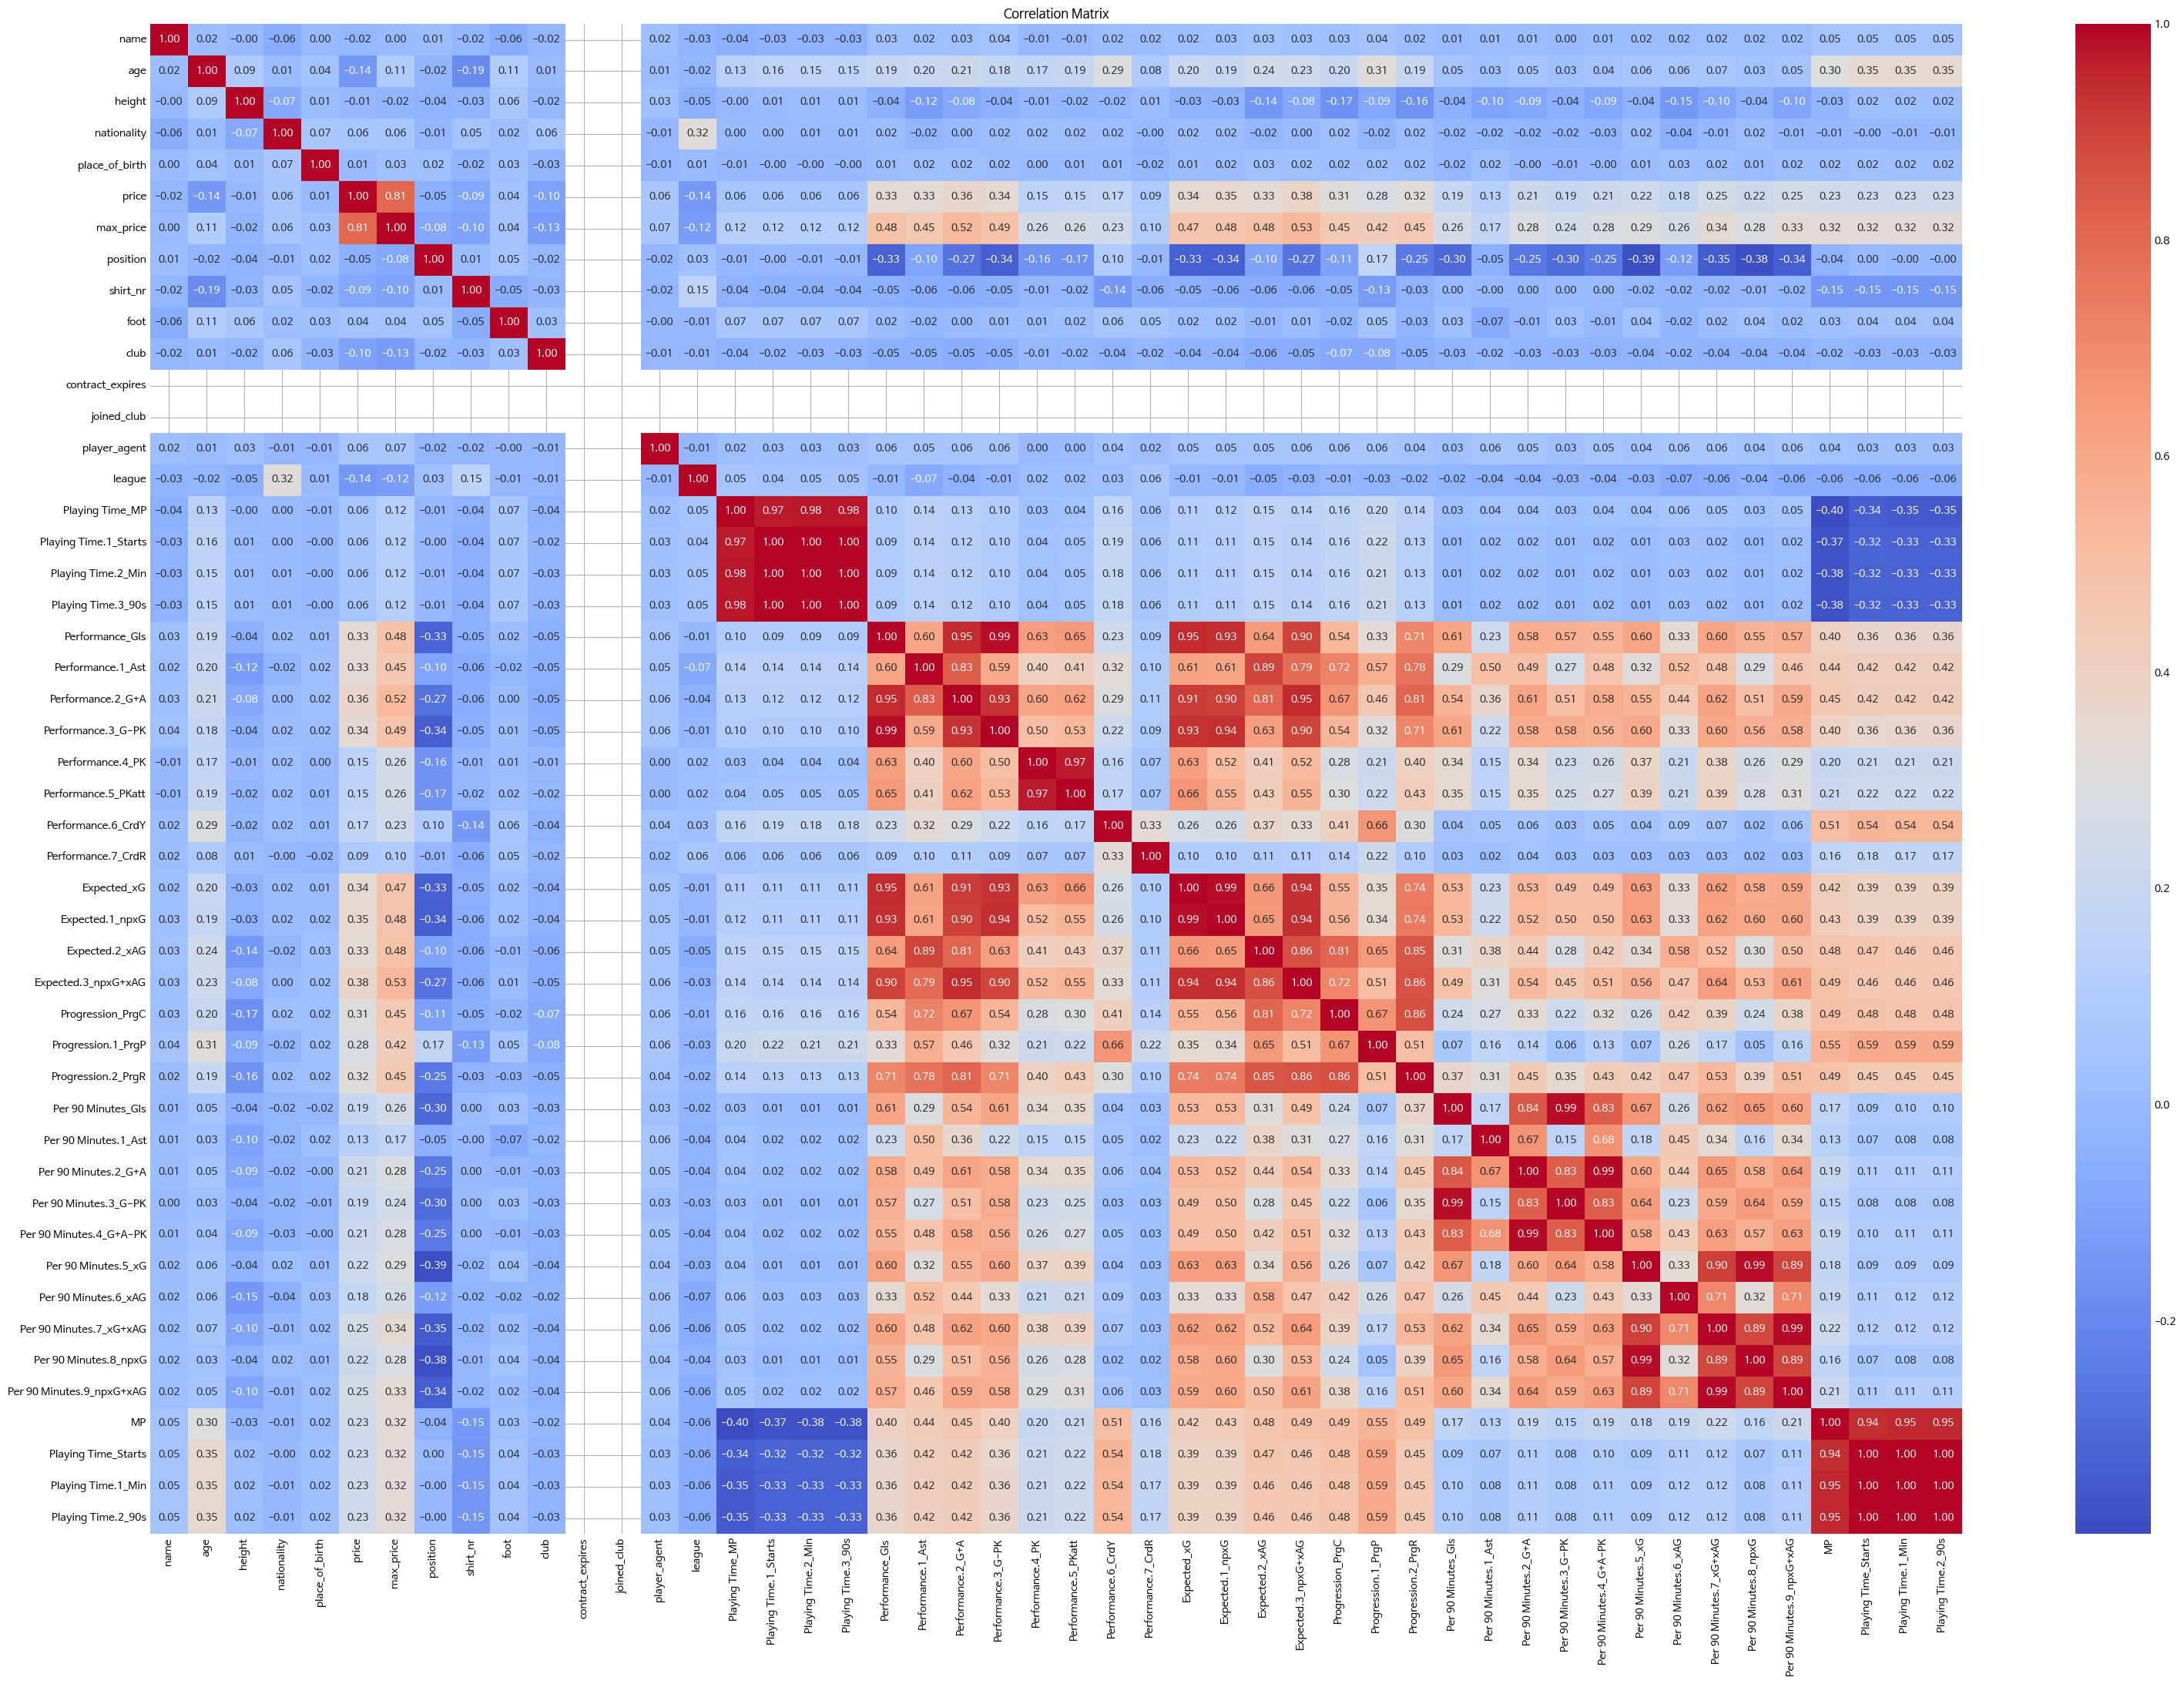

In [89]:

corr = df.corr()

# 상관 행렬 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [66]:
# 숫자형 열만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

## 이상치 필터링

In [67]:
 #IQR을 이용한 이상치 처리
Q1 = numeric_df.quantile(0.25)  # 25번째 백분위수 (하위 사분위수)
Q3 = numeric_df.quantile(0.75)  # 75번째 백분위수 (상위 사분위수)
IQR = Q3 - Q1  # Interquartile Range (IQR)

# 이상치의 하한 및 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 포함하는 조건
outliers_condition = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# 이상치가 있는 행을 필터링하여 확인
print("이상치가 있는 행:")
print(df[outliers_condition.any(axis=1)])

# 이상치를 제거 (선택 사항)
df_cleaned = df[~outliers_condition.any(axis=1)]


이상치가 있는 행:
                   name  age  height  nationality          place_of_birth  \
1          Aaron Hickey   20    1.85          295                 Glasgow   
2        Aaron Ramsdale   25    1.90           88              Chesterton   
3          Aaron Ramsey   32    1.78          378              Caerphilly   
4     Aaron Wan-Bissaka   25    1.83           93                  London   
7         Abdallah Sima   21    1.88          299                   Dakar   
...                 ...  ...     ...          ...                     ...   
2199    Ángel Rodríguez   36    1.71          317  Santa Cruz de Tenerife   
2200            Éderson   23    1.83           35            Campo Grande   
2202     Étienne Capoue   34    1.89          132                   Niort   
2207        Óscar Trejo   35    1.80           12     Santiago del Estero   
2209    Óscar de Marcos   34    1.82          317               Laguardia   

      price  max_price  position  shirt_nr  foot  ...  \
1      

# 데이터 모델링

In [81]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [82]:

# 종속 변수와 독립 변수 설정
X = df_cleaned.drop(['이적료'], axis=1).select_dtypes(include=['float64', 'int64'])  # 이적료를 제외한 숫자형 변수들
y = df_cleaned['이적료']

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"평균 제곱 오차 (MSE): {mse}")
print(f"결정 계수 (R^2): {r2}")

# 회귀 계수 출력
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)



KeyError: "['이적료'] not found in axis"

In [27]:
pip install statsmodels


In [28]:
import statsmodels.api as sm

# 종속 변수와 독립 변수 설정
X = df_cleaned.drop(['이적료'], axis=1).select_dtypes(include=['float64', 'int64'])  # 이적료를 제외한 숫자형 변수들
y = df_cleaned['이적료']

# statsmodels는 상수 항을 명시적으로 추가해야 함
X = sm.add_constant(X)

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 생성 및 학습
model = sm.OLS(y_train, X_train).fit()

# 모델 요약 정보 출력
print(model.summary())

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"평균 제곱 오차 (MSE): {mse}")
print(f"결정 계수 (R^2): {r2}")

                            OLS Regression Results                            
Dep. Variable:                    이적료   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     73.01
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          4.11e-196
Time:                        04:53:09   Log-Likelihood:                -2380.1
No. Observations:                 875   AIC:                             4814.
Df Residuals:                     848   BIC:                             4943.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

평균 제곱 오차 (MSE): 17.06209006094088
MSE 값은 모델의 예측 값과 실제 값 사이의 평균 제곱 오차를 나타냅니다. 값이 작을수록 모델의 예측이 실제 값에 가깝다는 것을 의미합니다.

결정 계수 (R²): 0.6288053264078616
R² 값은 모델이 종속 변수의 변동성을 얼마나 설명하는지를 나타냅니다. 0.6288은 약 62.88%의 변동성을 설명할 수 있다는 의미로, 중간 정도의 설명력을 가집니다.

회귀 계수 (Coefficient):
각 독립 변수의 회귀 계수는 해당 변수가 종속 변수에 미치는 영향을 나타냅니다. 양수인 경우 종속 변수에 긍정적인 영향을, 음수인 경우 부정적인 영향을 미칩니다.

나이의 계수는 -0.4960184로, 나이가 많을수록 종속 변수는 감소하는 경향이 있습니다.
키의 계수는 0.2566906으로, 키가 클수록 종속 변수는 증가하는 경향이 있습니다.
최고 이적료의 계수는 0.5463842로, 최고 이적료가 높을수록 종속 변수는 증가하는 경향이 있습니다.

특이한 점:
기대 득점_xG의 계수는 -61.44213, 기대 득점.1_npxG의 계수는 52.28305로, 서로 상반된 영향을 미치는 것으로 보입니다.
90분당 기대 득점의 계수는 536.4857, 90분당 기대 득점 (페널티 제외)의 계수는 -511.8018로, 큰 값의 양과 음의 영향이 나타납니다.

특정 변수 해석:
출전 시간_MP, 출전 시간.1_선발, 출전 시간.2_분, 출전 시간.3_90분 등 출전 시간 관련 변수들이 종속 변수에 미치는 영향은 매우 작거나 무시할 수 있는 수준입니다.
성적_득점, 성적.3_필드골 (페널티 제외)는 종속 변수에 긍정적인 영향을 미치며, 성적.1_도움은 부정적인 영향을 미칩니다.
기대 득점+기대 도움_npxG+xAG는 종속 변수에 긍정적인 영향을 미치는 반면, 기대 도움_xAG는 부정적인 영향을 미칩니다.

#EDA 상관분석
- 피어슨 상관 계수 이용 독립변수와 이적료 간 상관관계 파악

## 피어슨 상관 분석

In [83]:
# NaN 값이 있는 변수들 확인
nan_columns = corr.columns[corr.isna().any()].tolist()
print("NaN 값이 있는 변수들:", nan_columns)

# 해당 변수들의 값 분포 확인
print(df_cleaned[nan_columns].describe())

# 결측치가 있는 열 제거
df_cleaned = df_cleaned.dropna(axis=1, how='any')

# 상수 값 (모든 값이 동일한) 열 제거
df_cleaned = df_cleaned.loc[:, df_cleaned.apply(pd.Series.nunique) != 1]

NaN 값이 있는 변수들: ['name', 'age', 'height', 'nationality', 'place_of_birth', 'price', 'max_price', 'position', 'shirt_nr', 'foot', 'club', 'contract_expires', 'joined_club', 'player_agent', 'league', 'Playing Time_MP', 'Playing Time.1_Starts', 'Playing Time.2_Min', 'Playing Time.3_90s', 'Performance_Gls', 'Performance.1_Ast', 'Performance.2_G+A', 'Performance.3_G-PK', 'Performance.4_PK', 'Performance.5_PKatt', 'Performance.6_CrdY', 'Performance.7_CrdR', 'Expected_xG', 'Expected.1_npxG', 'Expected.2_xAG', 'Expected.3_npxG+xAG', 'Progression_PrgC', 'Progression.1_PrgP', 'Progression.2_PrgR', 'Per 90 Minutes_Gls', 'Per 90 Minutes.1_Ast', 'Per 90 Minutes.2_G+A', 'Per 90 Minutes.3_G-PK', 'Per 90 Minutes.4_G+A-PK', 'Per 90 Minutes.5_xG', 'Per 90 Minutes.6_xAG', 'Per 90 Minutes.7_xG+xAG', 'Per 90 Minutes.8_npxG', 'Per 90 Minutes.9_npxG+xAG', 'MP', 'Playing Time_Starts', 'Playing Time.1_Min', 'Playing Time.2_90s']
               age       height  nationality        price    max_price  \
count  10

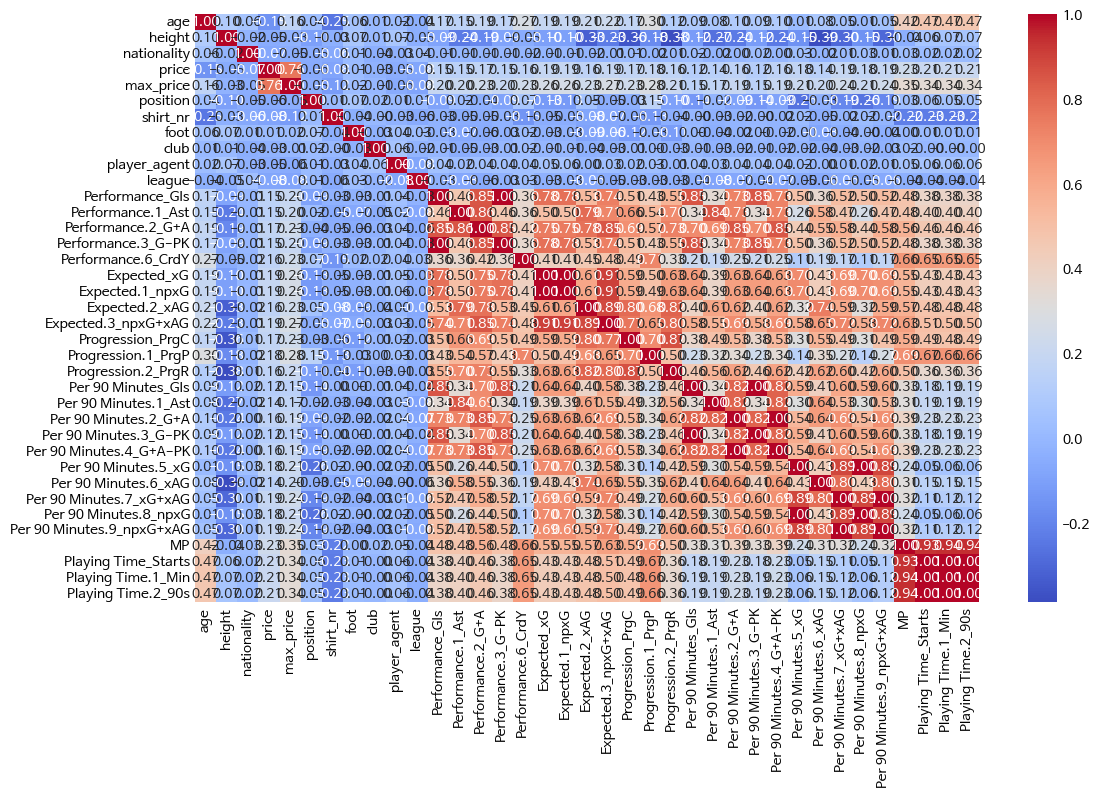

                                age    height  nationality     price  \
age                        1.000000  0.104118     0.062773 -0.151645   
height                     0.104118  1.000000    -0.023133 -0.052304   
nationality                0.062773 -0.023133     1.000000 -0.067019   
price                     -0.151645 -0.052304    -0.067019  1.000000   
max_price                  0.163845 -0.028856    -0.049873  0.764723   
position                   0.035927 -0.101901    -0.053045 -0.058619   
shirt_nr                  -0.249507 -0.034994    -0.062038 -0.083807   
foot                       0.056382  0.071998     0.011921  0.014677   
club                       0.008537  0.007497    -0.040208 -0.027154   
player_agent               0.023125  0.069515    -0.030730 -0.049290   
league                    -0.038446 -0.045107     0.038541 -0.081130   
Performance_Gls            0.165059 -0.085140    -0.005837  0.150007   
Performance.1_Ast          0.153708 -0.237331    -0.010567  0.14

In [84]:


# 숫자형 데이터만 선택
numeric_df_cleaned = df_cleaned.select_dtypes(include=['float64', 'int64'])

# 상관 분석
corr = numeric_df_cleaned.corr()

# 상관 계수 행렬 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

print(corr)


In [91]:


df_cleaned = df[['나이', '키', '이적료']]

# 나이와 이적료 간의 산점도
plt.figure(figsize=(12, 6))

# 나이와 이적료
plt.subplot(1, 2, 1)
plt.scatter(df_cleaned['나이'], df_cleaned['이적료'], alpha=0.5)
plt.title('나이 vs 이적료')
plt.xlabel('나이')
plt.ylabel('이적료')

# 키와 이적료 간의 산점도
plt.subplot(1, 2, 2)
plt.scatter(df_cleaned['키'], df_cleaned['이적료'], alpha=0.5)
plt.title('키 vs 이적료')
plt.xlabel('키')
plt.ylabel('이적료')

plt.tight_layout()
plt.show()


KeyError: "None of [Index(['나이', '키', '이적료'], dtype='object')] are in the [columns]"

희귀분석

                            OLS Regression Results                            
Dep. Variable:                    이적료   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     73.01
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          4.11e-196
Time:                        04:53:13   Log-Likelihood:                -2380.1
No. Observations:                 875   AIC:                             4814.
Df Residuals:                     848   BIC:                             4943.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

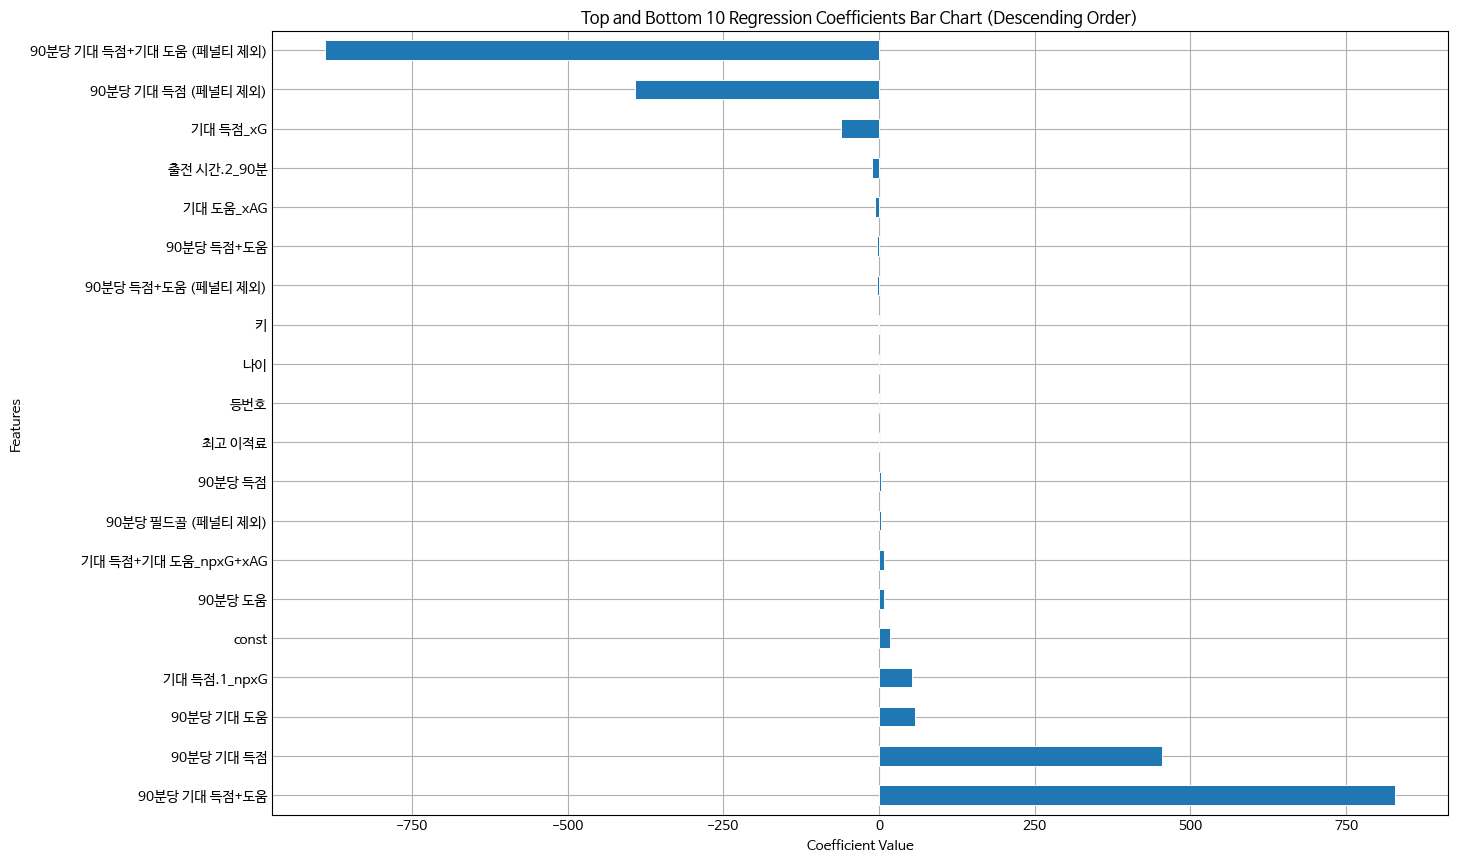

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 데이터 불러오기 및 전처리 (df_cleaned는 이미 전처리된 데이터프레임으로 가정)
# df_cleaned = pd.read_csv('path_to_your_data.csv')  # 예시로 데이터 파일을 불러오는 코드

# 종속 변수와 독립 변수 설정
X = df_cleaned.drop(['이적료'], axis=1).select_dtypes(include=['float64', 'int64'])  # 이적료를 제외한 숫자형 변수들
y = df_cleaned['이적료']

# statsmodels는 상수 항을 명시적으로 추가해야 함
X = sm.add_constant(X)

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 생성 및 학습
model = sm.OLS(y_train, X_train).fit()

# 모델 요약 정보 출력
print(model.summary())

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"평균 제곱 오차 (MSE): {mse}")
print(f"결정 계수 (R^2): {r2}")

# 회귀 계수 출력
coefficients = pd.DataFrame(model.params, X.columns, columns=['Coefficient'])

# 상위 10개 회귀 계수 추출 (높은 순서)
top_10_coefficients = coefficients.nlargest(10, 'Coefficient')

# 하위 10개 회귀 계수 추출 (낮은 순서)
bottom_10_coefficients = coefficients.nsmallest(10, 'Coefficient')

# 데이터 합치기 (상위 10개와 하위 10개를 합친 후 내림차순으로 정렬)
combined_coefficients = pd.concat([top_10_coefficients, bottom_10_coefficients]).sort_values(by='Coefficient', ascending=False)

# 막대 차트를 위한 데이터 준비
coef_values = combined_coefficients['Coefficient'].values
coef_labels = combined_coefficients.index

# 막대 차트 시각화
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots(figsize=(12, 8))

# 가로 막대 차트 그리기
y = np.arange(len(coef_values))
x = coef_values
ax.barh(y, x, height=0.5, edgecolor="white", linewidth=0.7)

# 축 레이블 및 제목 설정
ax.set_yticks(y)
ax.set_yticklabels(coef_labels)
ax.set_ylim(-0.5, len(coef_values)-0.5)

plt.title('Top and Bottom 10 Regression Coefficients Bar Chart (Descending Order)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

plt.show()


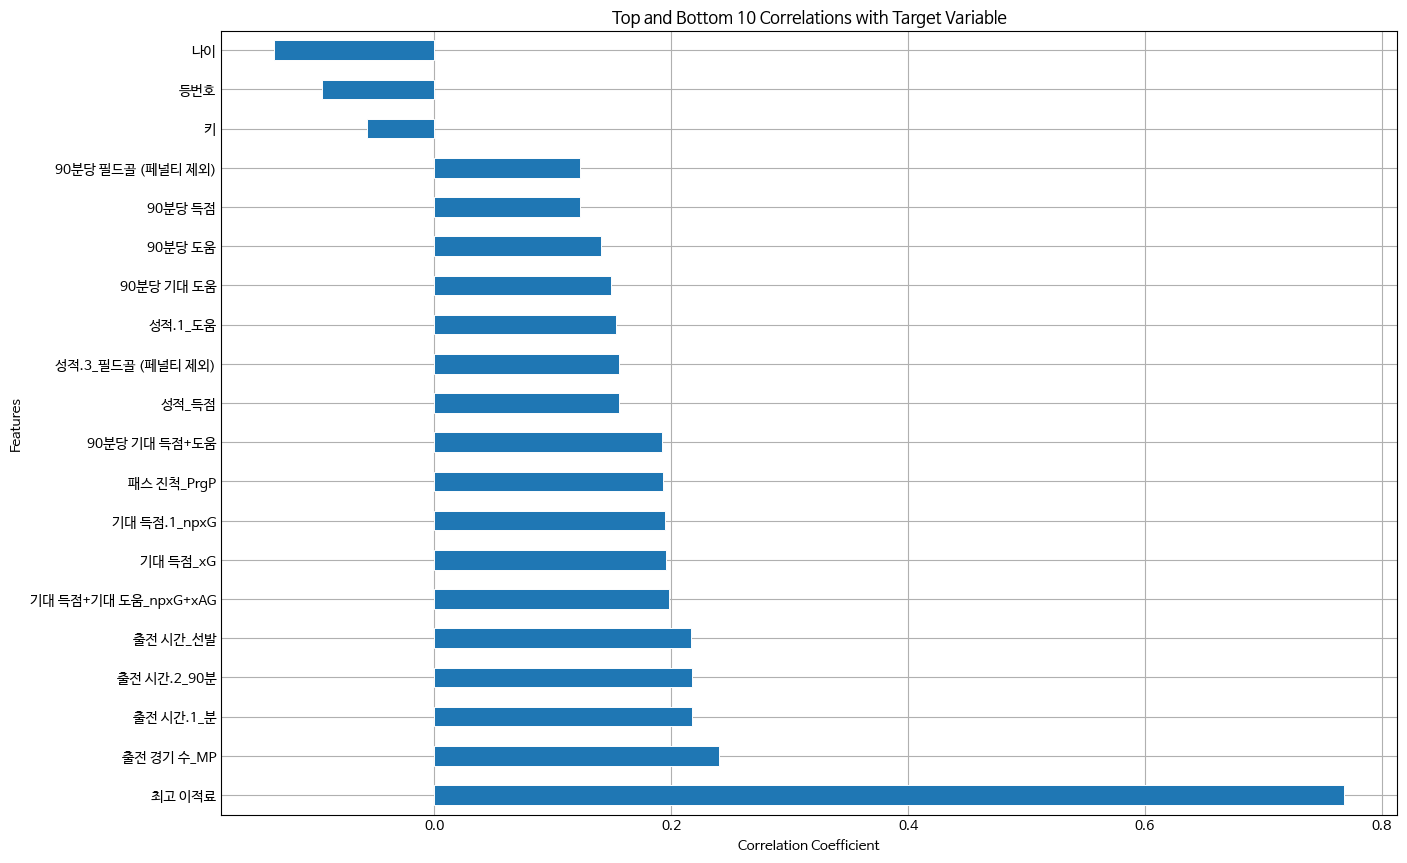

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기 및 전처리 (df_cleaned는 이미 전처리된 데이터프레임으로 가정)
# df_cleaned = pd.read_csv('path_to_your_data.csv')  # 예시로 데이터 파일을 불러오는 코드

# 숫자형 변수들만 선택
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

# 종속 변수 설정
target_variable = '이적료'

# 종속 변수와 독립 변수 간의 상관계수 계산
correlations = numeric_df.corr()[target_variable].drop(target_variable)

# 상위 10개 상관계수 추출 (절대값 기준)
top_10_correlations = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_correlations]

# 하위 10개 상관계수 추출 (절대값 기준)
bottom_10_correlations = correlations.abs().nsmallest(10).index
bottom_10_corr_values = correlations[bottom_10_correlations]

# 데이터 합치기 (상위 10개와 하위 10개를 합친 후 내림차순으로 정렬)
combined_correlations = pd.concat([top_10_corr_values, bottom_10_corr_values]).sort_values(ascending=False)

# 막대 차트를 위한 데이터 준비
corr_values = combined_correlations.values
corr_labels = combined_correlations.index

# 막대 차트 시각화
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots(figsize=(12, 8))

# 가로 막대 차트 그리기
y = np.arange(len(corr_values))
x = corr_values
ax.barh(y, x, height=0.5, edgecolor="white", linewidth=0.7)

# 축 레이블 및 제목 설정
ax.set_yticks(y)
ax.set_yticklabels(corr_labels)
ax.set_ylim(-0.5, len(corr_values)-0.5)

plt.title('Top and Bottom 10 Correlations with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

plt.show()
